<a href="https://colab.research.google.com/github/asafbigel/digit_classification/blob/main/digit_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the dataset

Set iterations number

In [1]:
NUM_OF_ITERATION_PLA = 1000
NUM_OF_ITERATION_SOFTMAX = 1000

Import librarys

In [2]:
from sklearn.datasets import fetch_openml
import time
import numpy as np
from tqdm.notebook import tqdm
import sys
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Fetch MNIST dataset

In [3]:
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

Fix X values

In [4]:
X = X/255

# add a column of ones to the features for the bias term
X = np.c_[np.ones(X.shape[0]), X]

Convert y to array integer (one-hot encoding)

In [5]:
y = y.astype(int)
temp = np.full((len(y), 10), 0)
for i in range(len(y)):
  temp[i, y[i]] = 1
y = temp

Split the dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=(1/7))

# **Perceptron Learning Algorithm**

Define the misclassified recognize function

In [7]:
def evaluate(w, X, y):
    predictions = np.sign(X @ w)
    misclassified = X[predictions != y]
    misclassified_labels = y[predictions != y]
    return misclassified, misclassified_labels

def percetron_train(w0, X, y, j):
    num_of_errors = len(y)
    pass_rate = 0
    pbar = tqdm(range(NUM_OF_ITERATION_PLA), desc='Num of iterations', leave=False)
    for i in pbar:
        misclassifieds, misclassifieds_labels = evaluate(w0, X, y)
        if len(misclassifieds) <= num_of_errors:
            num_of_errors = len(misclassifieds)
            best_w = w0
            pass_rate = ((len(y) - num_of_errors) /  len(y)) * 100
            print (f"""\rTrain digit: {j}. Errors: {num_of_errors}, pass rate: {pass_rate:.0f}%. Iteration num: {i}""", end ='')

        if len(misclassifieds) == 0: # or pass_rate >= 97:
          pbar.close()
          break

        # Update weights
        rand = np.random.randint(0, len(misclassifieds))
        x0 = misclassifieds[rand]
        y0 = misclassifieds_labels[rand]
        w0 = w0 + x0 * y0
    print("")
    return best_w

def digit_flow(w, y, i):
    w[i] = percetron_train(w[i], X_train, y, i)

Initialization of weights for each digit (0-9).

Change from 0/1 lables, to -1/1 labels

In [8]:
w = np.zeros((10,785))
y_train_0 = y_train.copy()
y_test_0 = y_test.copy()
y_train_0[y_train_0 == 0] = -1
y_test_0[y_test_0 == 0] = -1

Train the PLA for each digit

In [9]:
# Save timestamp
start = time.time()

for j in tqdm(range(10), desc=f'Training for all digits'):

  digit_flow(w, y_train_0[:,j], j)

# Save timestamp
end = time.time()
PLA_time = end - start
print(f"total time: {PLA_time} for {NUM_OF_ITERATION_PLA} iterations")

Training for all digits:   0%|          | 0/10 [00:00<?, ?it/s]

Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 0. Errors: 474, pass rate: 99%. Iteration num: 993


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 1. Errors: 453, pass rate: 99%. Iteration num: 989


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 2. Errors: 1353, pass rate: 98%. Iteration num: 920


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 3. Errors: 1720, pass rate: 97%. Iteration num: 479


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 4. Errors: 1227, pass rate: 98%. Iteration num: 786


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 5. Errors: 1967, pass rate: 97%. Iteration num: 601


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 6. Errors: 877, pass rate: 99%. Iteration num: 916


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 7. Errors: 1004, pass rate: 98%. Iteration num: 997


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 8. Errors: 2891, pass rate: 95%. Iteration num: 944


Num of iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Train digit: 9. Errors: 2556, pass rate: 96%. Iteration num: 762
total time: 414.803923368454 for 1000 iterations


predict the result

For digit 0: Accuracy : 98.86% , sensitivity : 93.51% , specificity : 99.44%
For digit 1: Accuracy : 99.20% , sensitivity : 96.38% , specificity : 99.56%
For digit 2: Accuracy : 97.68% , sensitivity : 82.74% , specificity : 99.42%
For digit 3: Accuracy : 97.02% , sensitivity : 76.09% , specificity : 99.30%
For digit 4: Accuracy : 97.91% , sensitivity : 89.02% , specificity : 98.89%
For digit 5: Accuracy : 96.50% , sensitivity : 70.11% , specificity : 99.14%
For digit 6: Accuracy : 98.60% , sensitivity : 91.14% , specificity : 99.36%
For digit 7: Accuracy : 98.26% , sensitivity : 90.59% , specificity : 99.16%
For digit 8: Accuracy : 94.78% , sensitivity : 61.65% , specificity : 98.45%
For digit 9: Accuracy : 95.47% , sensitivity : 69.62% , specificity : 98.32%


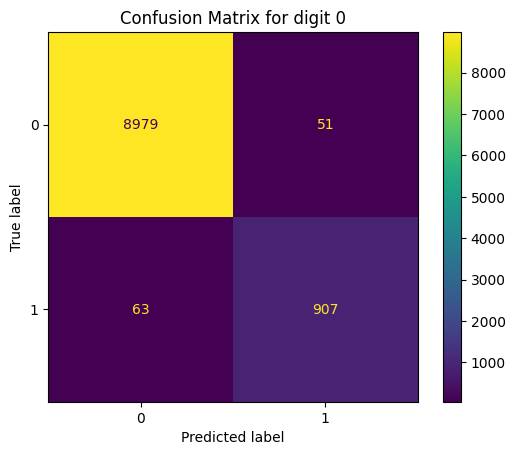

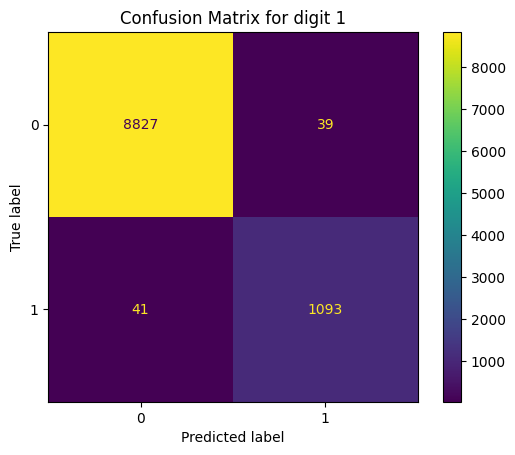

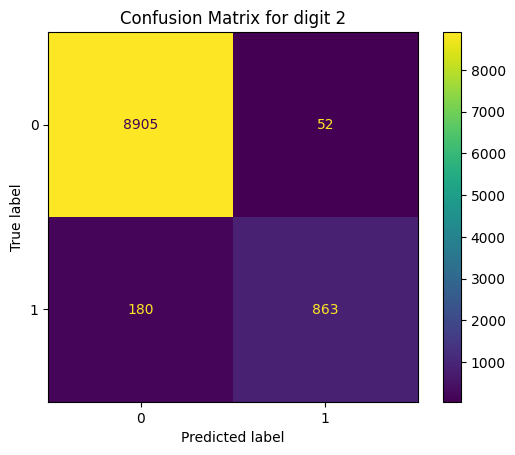

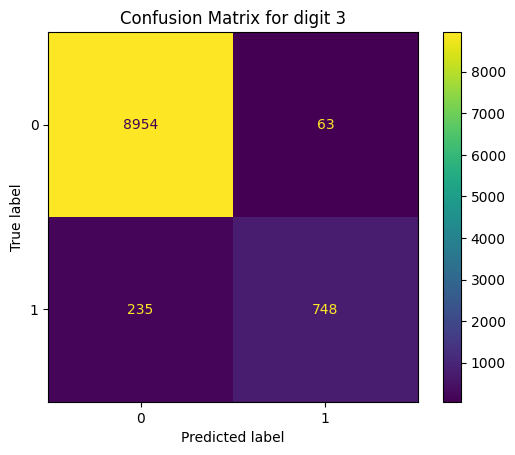

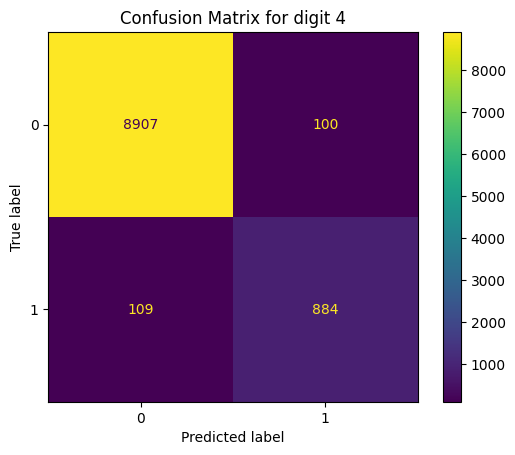

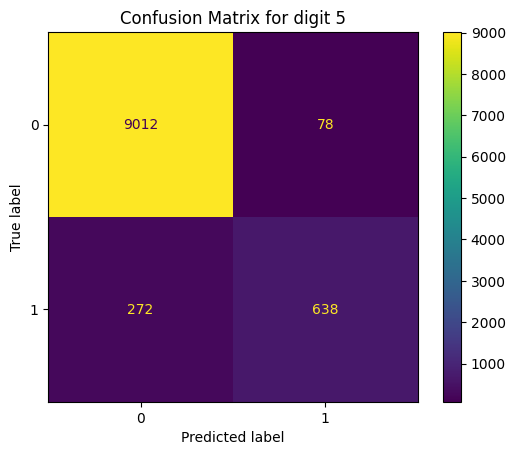

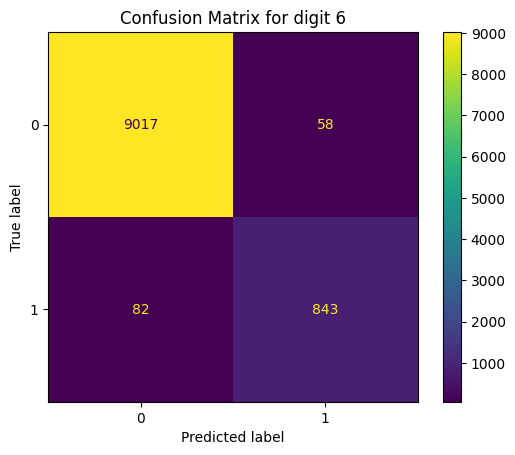

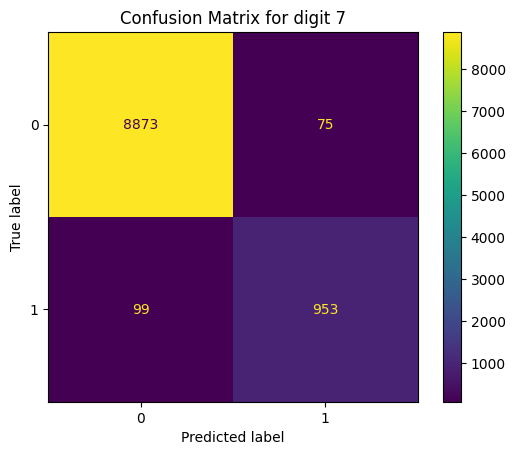

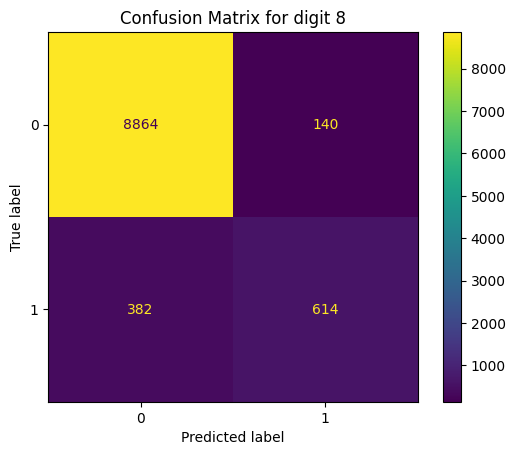

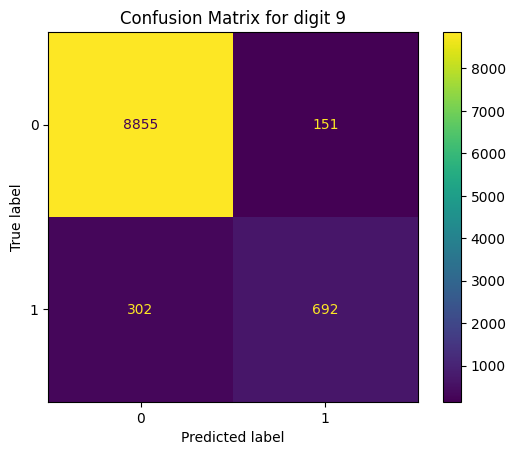

In [10]:
predictions = np.empty((10, len(y_test)))

for j in range(10):

  predictions[j] = np.sign(X_test @ w[j])

  TP = np.sum((predictions[j] == 1) & (y_test_0[:, j] == 1))
  TN = np.sum((predictions[j] == -1) & (y_test_0[:, j] == -1))
  FP = np.sum((predictions[j] == 1) & (y_test_0[:, j] == -1))
  FN = np.sum((predictions[j] == -1) & (y_test_0[:, j] == 1))

  Accuracy = (TP+TN)/(TP+TN+FP+FN) * 100
  sensitivity = TP/(TP+FN) * 100
  specificity = TN/(TN+FP) * 100

  print(f'For digit {j}: Accuracy : {Accuracy:.2f}% , sensitivity : {sensitivity:.2f}% , specificity : {specificity:.2f}%')

  conf_matrix = confusion_matrix(y_test_0[:, j], predictions[j])
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
  cm_display.plot()
  cm_display.ax_.set_title(f"Confusion Matrix for digit {j}")

Calculate the total result for the PLA complet module

Accuracy: 81.53%


Text(0.5, 1.0, 'Confusion Matrix for PLA')

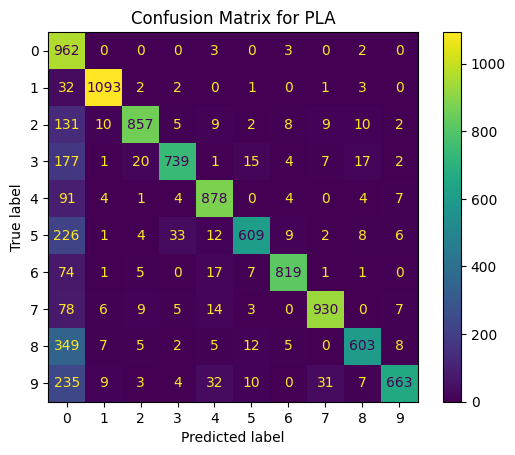

In [11]:
# find the real prediction in regular mode instead of one-hot
y_test_indices = np.argmax(y_test_0, axis=1)
h_hat_indices = np.argmax(predictions, axis=0)

accuracy_PLA = h_hat_indices[h_hat_indices==y_test_indices].shape[0]*100/y_test.shape[0]
print(f'Accuracy: {accuracy_PLA:.2f}%')

conf_matrix = confusion_matrix(y_test_indices, h_hat_indices)

display_labels = [str(i) for i in range(y_test.shape[1])]

cm_display_PLA = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = display_labels)
cm_display_PLA.plot()
cm_display_PLA.ax_.set_title(f"Confusion Matrix for PLA")

# Softmax Regression

## set the functions

In [12]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def yhat(w, X):
  return sigmoid(X@w)

def J(w,X,y,yh):
  """
  Loss function
  cross entropy function
  """
  m = X.shape[0]*10
  i = (-y * np.log(yh) - (1-y) * np.log(1-yh))
  j = (1/(m)) * np.sum(i)
  return j

def dw(w,X,y,yh):
  m = X.shape[0]*10
  dw = (1/m) * X.T@(yh-y)
  return dw
def db(w, X,y, yh):
  m = X.shape[0]*10
  return (1/m) * np.sum(yh-y)

In [13]:
def softmax(z):
  "Return the softmax output of a vector"
  exp_z = np.exp(z)
  sum = exp_z.sum()
  softmax_z = np.round(exp_z/sum, 3)
  return softmax_z

## set the W, alpha, anf j list

In [14]:
w1 = np.zeros((785, 10))
# set the bias
w1[784,:] = 0.01
alpha = 0.2

In [15]:
# errors count list
j_list = []

## Training

In [16]:
# Save timestamp
start = time.time()

for i in tqdm(range(NUM_OF_ITERATION_SOFTMAX)):
  yh = yhat(w1,X_train)
  dw_ = dw(w1,X_train,y_train,yh)
  w1 -= alpha*dw_
  j = J(w1, X_train, y_train,yh)
  j_list.append(j)
  if (i%10 == 0):
    print (f"""\rj (error rate): {j}""", end ='')

# Save timestamp
end = time.time()
softmax_time = end- start
print()
print(f'len j_list (count of iterations): {len(j_list)}')
print(f'j = {j}')
print(f"total time: {softmax_time} for {NUM_OF_ITERATION_SOFTMAX} iterations")

  0%|          | 0/1000 [00:00<?, ?it/s]

j (error rate): 0.11245571628357756
len j_list (count of iterations): 1000
j = 0.11221300258746254
total time: 467.3559446334839 for 1000 iterations


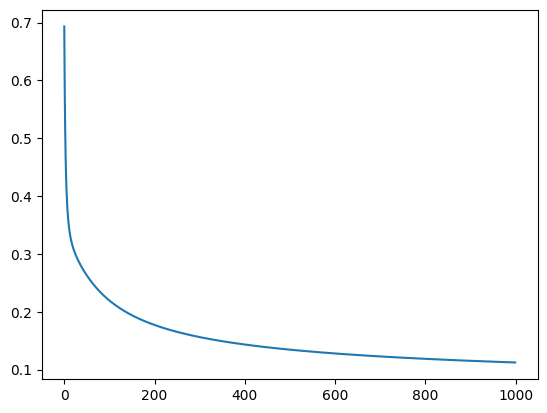

In [17]:
plt.plot(j_list)

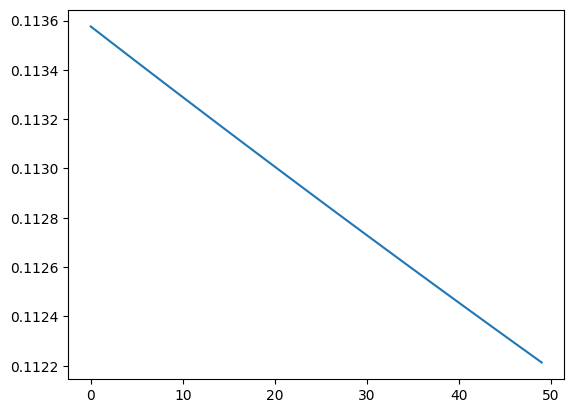

In [18]:
plt.plot(j_list[-50:])

## Predict

Accuracy: 86.35%


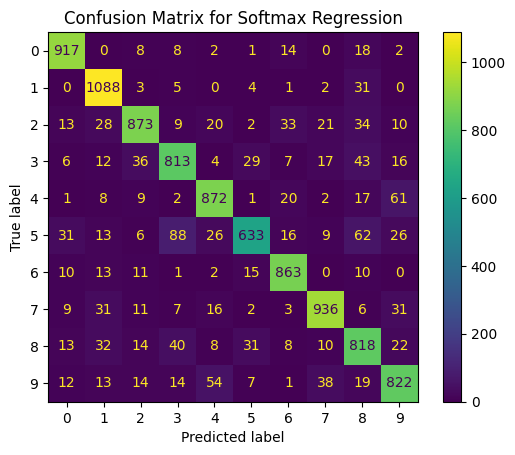

In [19]:
predicts = (X_test@w1)
predicted_classes = np.argmax(predicts, axis=1)
np.set_printoptions(precision=2)

# find the real prediction in regular mode instead of one-hot
y_test_indices = np.argmax(y_test, axis=1)
h_hat_indices = np.argmax(predicts, axis=1)

conf_matrix = confusion_matrix(y_test_indices, h_hat_indices)

display_labels = [str(i) for i in range(y_test.shape[1])]

cm_display_softmax = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = display_labels)
cm_display_softmax.plot()
cm_display_softmax.ax_.set_title(f"Confusion Matrix for Softmax Regression")

Accuracy_softmax = h_hat_indices[h_hat_indices==y_test_indices].shape[0]*100/y_test.shape[0]
print(f'Accuracy: {Accuracy_softmax:.2f}%')

Calculate the table of confusion for each digit and compute sensitivity (TPR) for each class


In [20]:
for i in range(10):
  TP = np.sum((h_hat_indices == i) & (y_test_indices == i))
  accuracy = TP / np.sum(y_test_indices == i)
  print(f'For digit {i}, accuracy: {accuracy}')

For digit 0, accuracy: 0.945360824742268
For digit 1, accuracy: 0.9594356261022927
For digit 2, accuracy: 0.8370086289549377
For digit 3, accuracy: 0.82706002034588
For digit 4, accuracy: 0.878147029204431
For digit 5, accuracy: 0.6956043956043956
For digit 6, accuracy: 0.932972972972973
For digit 7, accuracy: 0.8897338403041825
For digit 8, accuracy: 0.821285140562249
For digit 9, accuracy: 0.8269617706237424


# Linear regration

In [21]:
X2 = X_train
y2 = y_train

# Save timestamp
start = time.time()

w2 = (np.linalg.pinv(X2.T @ X2))@(X2.T @ y2)

# Save timestamp
end = time.time()
linear_time = end- start

print(f"total time: {linear_time}")

total time: 1.9848082065582275


**Predict y_train**

In [22]:
predicts = X_test@w2
yh = np.zeros_like(y_test, dtype=int)
yh[np.arange(predicts.shape[0]), predicts.argmax(axis=1)] = 1

incorrect count: 1486
Accuracy: 85.14 %


Text(0.5, 1.0, 'Confusion Matrix for Linear Regression')

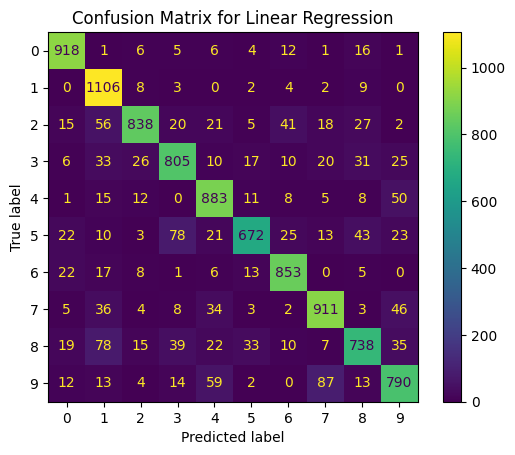

In [23]:
# find the real prediction in regular mode instead of one-hot
y_test_indices = np.argmax(y_test, axis=1)
h_hat_indices = np.argmax(yh, axis=1)

incorect_count = y_test_indices[y_test_indices!=h_hat_indices].shape[0]
print(f'incorrect count: {incorect_count}')
accuurancy_linear = (predicts.shape[0]-incorect_count)*100/predicts.shape[0]
print(f'Accuracy: {accuurancy_linear} %')

conf_matrix = confusion_matrix(y_test_indices, h_hat_indices)

display_labels = [str(i) for i in range(y_test.shape[1])]

cm_display_linear = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = display_labels)
cm_display_linear.plot()
cm_display_linear.ax_.set_title(f"Confusion Matrix for Linear Regression")

# Summery

In [24]:
print('\033[1m' + 'Summary:' + '\033[0m')
print("-" * 50) # Print a separator line
print(f"{'Model':<20}{'Accuracy (%)':<15}{'Training Time (s)':<20}")
print("-" * 50) # Print a separator line
print(f"{'PLA':<20}{accuracy_PLA:<15.2f}{PLA_time:<20.2f} for {NUM_OF_ITERATION_PLA} iterations")
print(f"{'Softmax Regression':<20}{Accuracy_softmax:<15.2f}{softmax_time:<20.2f} for {NUM_OF_ITERATION_SOFTMAX} iteration")
print(f"{'Linear Regression':<20}{accuurancy_linear:<15.2f}{linear_time:<20.2f}")
print("-" * 50) # Print a separator line

Summary:
--------------------------------------------------
Model               Accuracy (%)   Training Time (s)   
--------------------------------------------------
PLA                 81.53          414.80               for 1000 iterations
Softmax Regression  86.35          467.36               for 1000 iteration
Linear Regression   85.14          1.98                
--------------------------------------------------


Confusion Matrixs:


Text(0.5, 1.0, 'Confusion Matrix for Linear Regression')

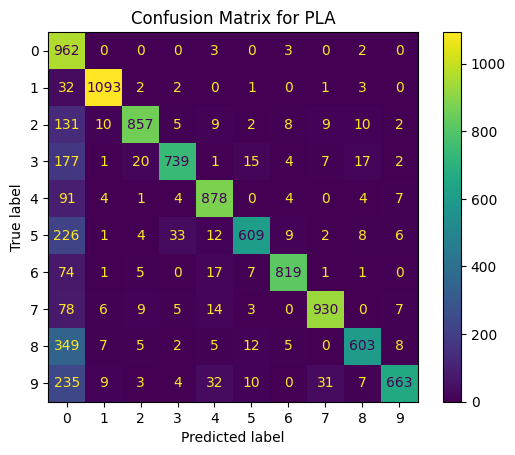

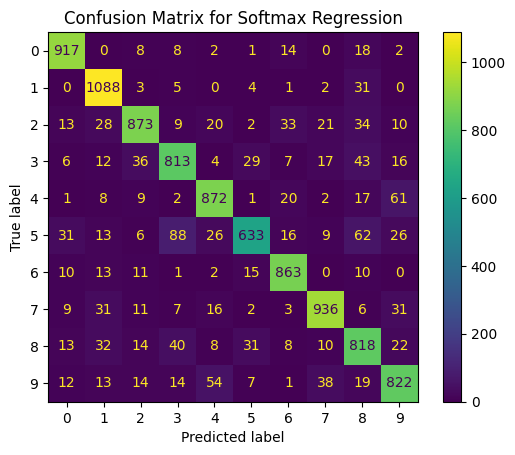

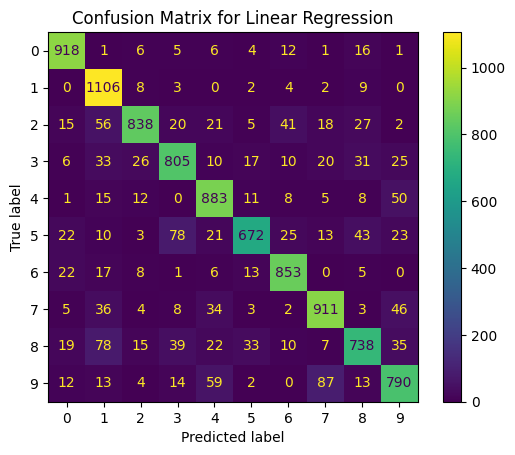

In [25]:
print ('\033[1m' + 'Confusion Matrixs:' + '\033[0m')
cm_display_PLA.plot()
cm_display_PLA.ax_.set_title(f"Confusion Matrix for PLA")
cm_display_softmax.plot()
cm_display_softmax.ax_.set_title(f"Confusion Matrix for Softmax Regression")
cm_display_linear.plot()
cm_display_linear.ax_.set_title(f"Confusion Matrix for Linear Regression")

**History summery:**

--------------------------------------------------
| Model               | Accuracy (%) | Training Time (s) | Note               |
|---------------------|--------------|-------------------|--------------------|
| PLA                 | 47.26        | 52.69             | for 20 iterations  |
| Softmax Regression  | 74.18        | 13.59             | for 20 iteration   |
| Linear Regression   | 85.14        | 13.33             |                    |
|---------------------|--------------|-------------------|--------------------|
| PLA                 | 76.20        | 427.89            | for 200 iterations |
| Softmax Regression  | 82.18        | 136.80            | for 200 iteration
| Linear Regression   | 85.38        | 11.10             |
|---------------------|--------------|-------------------|--------------------|
| PLA                 | 82.63        | 400.66            | for 1000 iterations
| Softmax Regression  | 86.89        | 507.80            | for 1000 iteration
| Linear Regression   | 85.55        | 1.90              |  
|---------------------|--------------|-------------------|--------------------|
| PLA                 | 84.37        | 1729.87           | for 5000 iterations
| Softmax Regression  | 89.57        | 2033.50           | for 5000 iteration
| Linear Regression   | 85.25        | 1.60                           

--------------------------------------------------
